In [5]:
import os
working_directory = os.getcwd()
print(working_directory)

/Users/vivekkannajayaprakash/Documents/Artificial Intelligence/Deep Learning/AI executed self 


In [6]:
import pandas as pd

In [7]:
diabetes = pd.read_csv("/Users/vivekkannajayaprakash/Documents/Artificial Intelligence/Deep Learning/AI datasets/pima-indians-diabetes.csv")
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

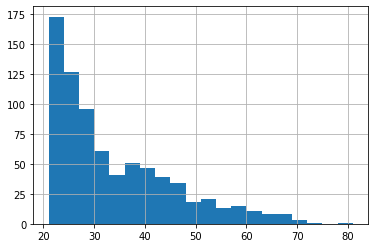

In [9]:
diabetes['Age'].hist(bins=20)

In [10]:
diabetes.columns 
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps', 'Insulin',
       'BMI', 'Pedigree']

diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x : (x - x.min()) / (x.max() - x.min()))

In [11]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [12]:
import tensorflow as tf

In [13]:
num_preg          = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc         = tf.feature_column.numeric_column('Glucose_concentration')
dias_press  = tf.feature_column.numeric_column('Blood_pressure')
tricep       = tf.feature_column.numeric_column('Triceps')
insulin              = tf.feature_column.numeric_column('Insulin')
bmi                  = tf.feature_column.numeric_column('BMI')
diabetes_pedigree  = tf.feature_column.numeric_column('Pedigree')
age                  = tf.feature_column.numeric_column('Age')

<AxesSubplot:>

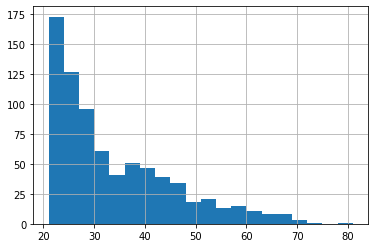

In [14]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list("Group" , ["A" , "B" , "C" , "D" ])
import matplotlib.pyplot as plt
%matplotlib inline
diabetes['Age'].hist(bins=20)

In [15]:
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Outcome', hash_bucket_size=2)

In [16]:
age_bucket = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

In [17]:
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree, age_bucket]

In [18]:
x_data = diabetes.drop('Class', axis=1)

x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [19]:
labels = diabetes['Class']

labels.head()

0    1
1    0
2    1
3    0
4    1
Name: Class, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test , y_train , y_test = train_test_split(x_data , labels , test_size = 0.33 , random_state = 101)

In [22]:
input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [23]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/y8/409hpy091s38cytvcvt8byr00000gn/T/tmpy0ukx_sy', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [24]:
model.train(input_fn=input_func, steps=1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.


/Users/vivekkannajayaprakash/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/y8/409hpy091s38cytvcvt8byr00000gn/T/tmpy0ukx_sy/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 0.6931472, step = 0
INFO:tensorflow:global_step/sec: 330.092
INFO:tensorflow:loss = 0.64443123, step = 100 (0.304 sec)
INFO:tensorflow:global_step/sec: 354.056
INFO:tensorflow:loss = 0.45743886, step = 200 (0.282 sec)
INFO:tensorflow:global_step/sec: 548.989
INFO:tensorflow:loss = 0.52267873, step = 300 

In [25]:
pred_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_test, batch_size=10, num_epochs=1, shuffle=False)

In [26]:
predictions = model.predict(pred_input_func)

In [27]:
list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/y8/409hpy091s38cytvcvt8byr00000gn/T/tmpy0ukx_sy/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([0.11006343], dtype=float32),
  'logistic': array([0.5274881], dtype=float32),
  'probabilities': array([0.4725119, 0.5274881], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([0.5633366], dtype=float32),
  'logistic': array([0.6372242], dtype=float32),
  'probabilities': array([0.36277577, 0.6372242 ], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([-0.3120023], dtype=float32),
  'logistic': array([0.42262608], dtype=float32),
  'probabilities': array([0.5773739 , 0.42262608], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'

In [28]:
eval_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_test , y= y_test, batch_size=10, num_epochs=1, shuffle=False)

In [29]:
results = model.evaluate(eval_input_func)

results

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-05-13T23:19:45Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/y8/409hpy091s38cytvcvt8byr00000gn/T/tmpy0ukx_sy/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.64418s
INFO:tensorflow:Finished evaluation at 2021-05-13-23:19:46
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.72440946, accuracy_baseline = 0.6574803, auc = 0.7845, auc_precision_recall = 0.6271434, average_loss = 0.535341, global_step = 1000, label/mean = 0.34251967, loss = 0.5414954, precision = 0.60240966, prediction/mean = 0.3813523, recall = 0.57471263
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/y8/409hpy091s38cytvcvt8byr00000gn/T/tmpy0ukx_sy/model.ckpt-1000


{'accuracy': 0.72440946,
 'accuracy_baseline': 0.6574803,
 'auc': 0.7845,
 'auc_precision_recall': 0.6271434,
 'average_loss': 0.535341,
 'label/mean': 0.34251967,
 'loss': 0.5414954,
 'precision': 0.60240966,
 'prediction/mean': 0.3813523,
 'recall': 0.57471263,
 'global_step': 1000}